In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [9]:
start = '2012-01-01'
end = '2024-09-03'

stock ='AAPL'

data = yf.download(stock, start, end)
data.reset_index(inplace=True)
data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402628,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469280,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607714,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739514,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400
...,...,...,...,...,...,...,...
3181,2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200
3182,2024-08-27,226.000000,228.850006,224.889999,228.029999,228.029999,35934600
3183,2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200
3184,2024-08-29,230.100006,232.919998,228.880005,229.789993,229.789993,51906300


In [10]:
ma_100_days = data.Close.rolling(100).mean()

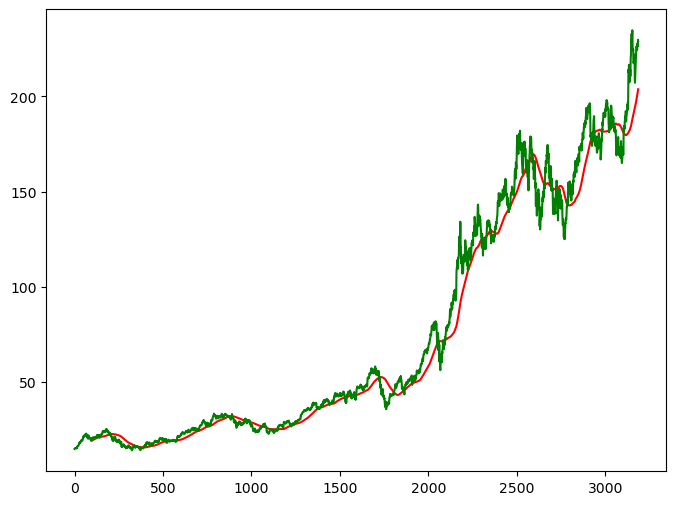

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')

plt.plot(data.Close,'g')

plt.show()

In [12]:
ma_200_days = data.Close.rolling(200).mean()

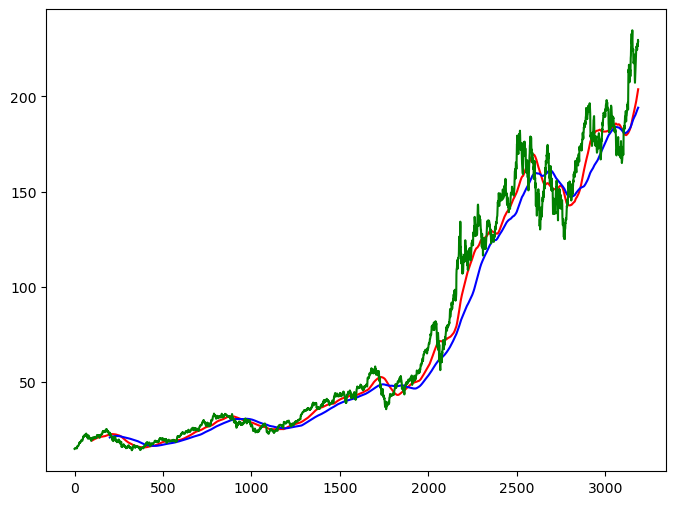

In [13]:
plt.figure(figsize=(8,6))

plt.plot(ma_100_days, 'r')

plt.plot(ma_200_days, 'b')

plt.plot(data.Close,'g')

plt.show()

In [14]:
data.dropna(inplace=True)

In [19]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [20]:
data_train.shape[0], data_test.shape[0]

(2548, 638)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_train_scale = scaler.fit_transform(data_train)

In [23]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'